## Observations and Insights 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine = pd.merge(study_results, mouse_metadata , how='outer', on="Mouse ID")
# Display the data table for preview
combine

#Sorting by time
sort_by_time = combine.sort_values("Timepoint", ascending= True) 
sort_by_time.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1460,w584,0,45.0,0,Infubinol,Male,3,29
1006,p136,0,45.0,0,Zoniferol,Female,5,28
461,a411,0,45.0,0,Ramicane,Male,3,22
1467,b447,0,45.0,0,Ceftamin,Male,2,30


In [16]:
combine.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [17]:
# Checking the number of mice.
num_mice = combine.pivot_table(index = ["Mouse ID"], aggfunc = 'size')
print(num_mice)


Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Length: 249, dtype: int64


In [18]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_ID = combine[combine["Mouse ID"]!= "g989"]
clean_mice_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [19]:
# Checking the number of mice in the clean DataFrame.
clean_mice_ID_count = clean_mice_ID.pivot_table(index = ["Mouse ID"], aggfunc = 'size')
clean_mice_ID_count


Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Length: 248, dtype: int64

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
statistics_groupby = clean_mice_ID.groupby(["Drug Regimen"])

stats_mean = statistics_groupby["Tumor Volume (mm3)"].mean()
stats_median = statistics_groupby["Tumor Volume (mm3)"].median()
stats_variance = statistics_groupby["Tumor Volume (mm3)"].var()
stats_std = statistics_groupby["Tumor Volume (mm3)"].std()
stats_sem = statistics_groupby["Tumor Volume (mm3)"].sem()
together = pd.DataFrame({
                "Tumor Mean": stats_mean, 
                "Tumor Median": stats_median, 
                "Tumor Variance": stats_variance, 
                "Tumor Std": stats_std, 
                "Tumor SEM": stats_sem})
together


,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

statistics_single = clean_mice_ID.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
statistics_single

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

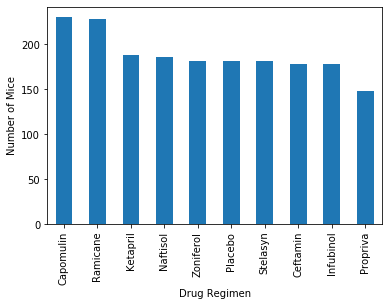

In [22]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

bar_pandas = clean_mice_ID["Drug Regimen"].value_counts().plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

([<matplotlib.axis.XTick at 0x1f4305d2188>,
 <a list of 10 Text xticklabel objects>)

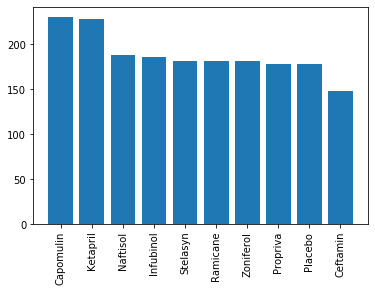

In [23]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot
number = clean_mice_ID["Drug Regimen"].value_counts()
name  = clean_mice_ID["Drug Regimen"].unique()

plt.bar(name, number)
tick_locations = [value for value in name]
plt.xticks(tick_locations, name,  rotation='vertical')


        Total Count  Percentage
Sex                            
Female          123   49.596774
Male            125   50.403226


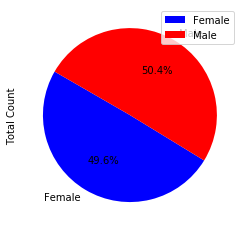

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#groupby gender to count the numbers
gender = clean_mice_ID.groupby(["Mouse ID", "Sex" ])
gender_df = pd.DataFrame(gender.size())

#Dataframe with counts by gender
gender_count = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender_count.columns = ["Total Count"]


#Percentage

gender_count["Percentage"] = (gender_count["Total Count"]/gender_count["Total Count"].sum())*100
gender_count
print(gender_count)
#Generating Pie Chart

colors = ["blue", "red"]
plot=gender_count.plot.pie(y= "Total Count", startangle = 150, colors = colors, autopct="%1.1f%%")

Text(0.5, 1.0, 'Male vs Female')

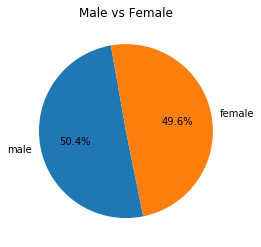

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

label = ["male", "female"]

#Entering the Values
male_size = gender_count.loc["Male", "Percentage"]
female_size = gender_count.loc["Female","Percentage"]

size = [male_size, female_size]

#Plotting a pie chart
plt.pie(size, labels = label, autopct = "%1.1f%%", startangle = 100)
plt.title ("Male vs Female")

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_regimens = clean_mice_ID[clean_mice_ID["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]


# Start by getting the last (greatest) timepoint for each mouse
final_tumor = four_regimens.groupby(["Mouse ID"])["Tumor Volume (mm3)"].last()
final_tumor2 = four_regimens.groupby(["Mouse ID"])["Drug Regimen"].last()
final_tumor4 = pd.merge(final_tumor, final_tumor2, how = "left", on = "Mouse ID")
final_tumor4



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#merge_df = pd.merge(final_tumor, clean_mice_ID, how="left", on = "Mouse ID")
#merge_df_rename = merge_df.rename(columns= {"Timepoint_x" : "Last Time Point", "Timepoint_y":"Timepoint"})
#merge_df_rename


,Tumor Volume (mm3),Drug Regimen
Mouse ID,,
a203,67.973419,Infubinol
a251,65.525743,Infubinol
a275,62.999356,Ceftamin
a411,38.407618,Ramicane
a444,43.047543,Ramicane
...,...,...
y769,68.594745,Ceftamin
y793,31.896238,Capomulin
y865,64.729837,Ceftamin


In [27]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)
tumor_data_cap = []
tumor_data_ram = []
tumor_data_lnf = []
tumor_data_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


tumor_data_cap.append(final_tumor4[final_tumor4["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"])
    

tumor_data_ram.append(final_tumor4[final_tumor4["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"])
 
tumor_data_lnf.append(final_tumor4[final_tumor4["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"])

tumor_data_cef.append(final_tumor4[final_tumor4["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"])

    # Locate the rows which contain mice on each drug and get the tumor volumes
print(tumor_data_cap)    
    

    

    # Determine outliers using upper and lower bounds
    
    #iqr = upperq - lowerq
    #lower_bound = lowerq - (1.5*iqr)
    #upper_bound = upperq + (1.5*iqr)
    

[Mouse ID
b128    38.982878
b742    38.939633
f966    30.485985
g288    37.074024
g316    40.159220
i557    47.685963
i738    37.311846
j119    38.125164
j246    38.753265
l509    41.483008
l897    38.846876
m601    28.430964
m957    33.329098
r157    46.539206
r554    32.377357
r944    41.581521
s185    23.343598
s710    40.728578
t565    34.455298
u364    31.023923
v923    40.658124
w150    39.952347
w914    36.041047
x401    28.484033
y793    31.896238
Name: Tumor Volume (mm3), dtype: float64]


In [31]:
# finding the outliers for Capomulin
cap_lowerq = np.quantile(tumor_data_cap, 0.25)
cap_upperq = np.quantile(tumor_data_cap, 0.75)

cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_lowerq)
cap_upper_bound = cap_upperq + (1.5*cap_upperq)

print("For Capomulin")
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")


In [ ]:
# finding the outliers for Ramicane
ram_lowerq = np.quantile(tumor_data_ram, 0.25)
ram_upperq = np.quantile(tumor_data_ram, 0.75)

ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_lowerq)
ram_upper_bound = ram_upperq + (1.5*ram_upperq)

print("For Ramicane")
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")


In [ ]:
# finding the outliers for Infubinol
lnf_lowerq = np.quantile(tumor_data_lnf, 0.25)
lnf_upperq = np.quantile(tumor_data_lnf, 0.75)

lnf_iqr = lnf_upperq-lnf_lowerq
lnf_lower_bound = lnf_lowerq - (1.5*cap_lowerq)
lnf_upper_bound = lnf_upperq + (1.5*cap_upperq)

print("For Ramicane")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
# finding the outliers for Capomulin
cap_lowerq = np.quantile(tumor_data_cap, 0.25)
cap_upperq = np.quantile(tumor_data_cap, 0.75)

cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_lowerq)
cap_upper_bound = cap_upperq + (1.5*cap_upperq)
print("For Ramicane")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
